In [1]:
# imporrt lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score


In [2]:
# load dataset
df = pd.read_csv('https://raw.githubusercontent.com/RohitG57/Insurance-Charges-Prediction/refs/heads/main/insurance.csv')

#hn5tar el feature we hnconvert el strings l numerical 
df = df.drop(['region'] ,axis= 1 )
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})
df['sex'] = df['sex'].map({'male': 1, 'female': 0})


## chieck if there are any null values
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
charges     0
dtype: int64

(1338, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   charges   1338 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 62.8 KB
               age          sex          bmi     children       smoker  \
count  1338.000000  1338.000000  1338.000000  1338.000000  1338.000000   
mean     39.207025     0.505232    30.663397     1.094918     0.204783   
std      14.049960     0.500160     6.098187     1.205493     0.403694   
min      18.000000     0.000000    15.960000     0.000000     0.000000   
25%      27.000000     0.000000    26.296250     0.000000     0.000000   
50%      39.000000     1.000000    30.400000     1.000000     0.000000   
75%

Text(0, 0.5, 'freq')

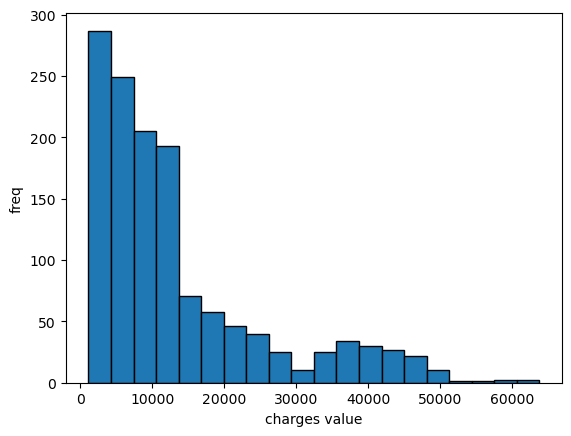

In [3]:
# information about data
print(df.shape)
df.info()
print(df.describe())

plt.hist(df['charges'], bins=20 ,edgecolor='black')
plt.xlabel('charges value')
plt.ylabel('freq')

In [4]:
#now we need to remove outliers ele heya el arkam el non normal msln aw elhagat el out of range
#fe kazaz tare2a mnhom IQR ele heya deh

##hena bn3rf eh homa asln
q1 = df['charges'].quantile(q=0.25)
q3 = df['charges'].quantile(q=0.75)

iqr = q3-q1

min = q1 - 1.5 * iqr
max = q3 + 1.5 * iqr

print(df.shape)

##heya bnms7hom
df = df[(df['charges'] >=min) & (df['charges'] <=max)]

(1338, 6)


In [5]:
print(df.shape)
## htla2y fe rows etms7t

(1199, 6)


In [6]:
## split data
y = df['charges']
x = df.drop('charges', axis = 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2 ,random_state=10)

#applayingg model
linr = LinearRegression()
linr.fit(x_train,y_train)

y_predict = linr.predict(x_test)

In [7]:
## evaluate aw bntest model
mse = mean_squared_error(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
rmse = np.sqrt(mse)

print(f'meann sqyare error: {mse} \nmean aboslute error: {mae} \nr2 score: {r2} \nroot mean squared error: {rmse}')


meann sqyare error: 28780979.397310916 
mean aboslute error: 2923.4057616901096 
r2 score: 0.5237868348631489 
root mean squared error: 5364.790713281453


Text(0.5, 1.0, 'actual vs prediction')

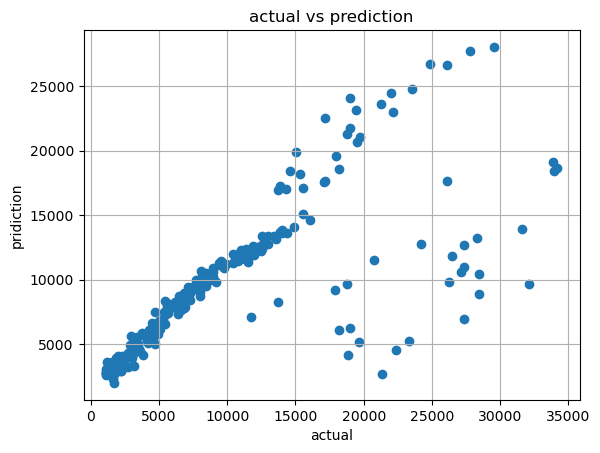

In [8]:
plt.scatter(y_test,y_predict)
plt.grid()
plt.xlabel('actual')
plt.ylabel('pridiction')
plt.title('actual vs prediction')

Text(0.5, 1.0, 'error sistribution')

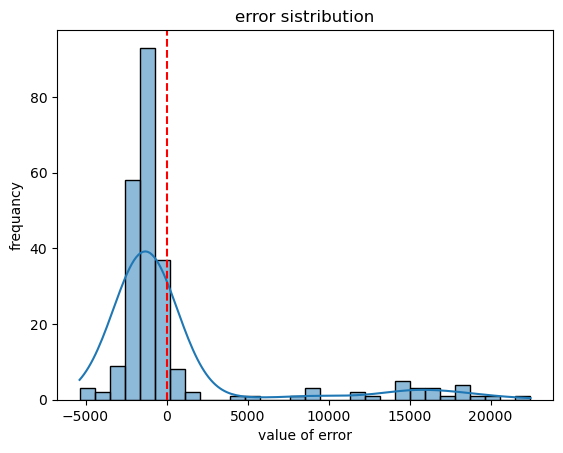

In [9]:
the_error = y_test - y_predict
sns.histplot(the_error, kde=True, bins=30)

plt.axvline(0, color='red', linestyle='--')
plt.xlabel("value of error")
plt.ylabel("frequancy")
plt.title("error sistribution")
